In [32]:
###PYTHON NOTEBOOK FOR VISUALIZATION OF FIGURES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#RANDOM SAMPLING FOR W SWEEP
from scipy.stats import qmc
import pandas as pd
sampler = qmc.LatinHypercube(d=4)
sample = sampler.random(n=10000)
l_bounds = [10E-8, 10E-7, 10E-6, 10E-5]

u_bounds = [10E-6, 10E-5, 10E-5, 10E-4]

sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
d = pd.DataFrame({'k1':sample_scaled[:,0], 'k2':sample_scaled[:,1], 'k3':sample_scaled[:,2] ,'k4':sample_scaled[:,3]})
d.to_csv('exp_data/lhc.csv')

In [3]:
fba_data_total = pd.read_csv("exp_data/sim_fba_data_1.csv")
ode_data_total = pd.read_csv("exp_data/sim_ode_data_1.csv")
sum_data_total = pd.read_csv("exp_data/sum_data_1.csv")

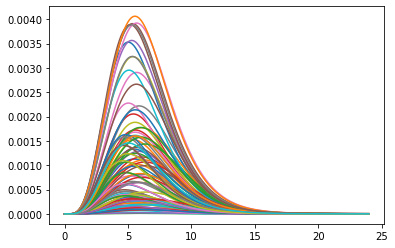

In [4]:
for w in ode_data_total.W.unique():
    ode_data = ode_data_total.loc[ode_data_total.W == w]
    plt.plot(ode_data.time, ode_data.bcar)

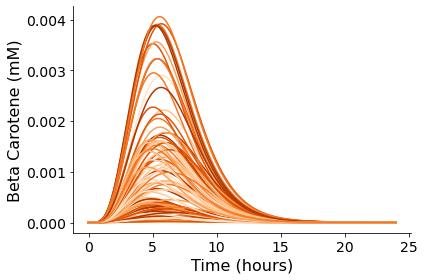

In [18]:
###FIGURE: Product curve visualization
sns.set_palette("Oranges")
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Time (hours)', fontsize=16)
ax.set_ylabel('Beta Carotene (mM)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
for w in ode_data_total.W.unique():
    ode_data = ode_data_total.loc[ode_data_total.W == w]
    ax.plot(ode_data.time, ode_data.bcar)
fig.tight_layout()
#if save_figs: fig.savefig('../figs/fatty_acid_pareto_curve.png', dpi=500)

Text(0.5, 1.0, 'FPP')

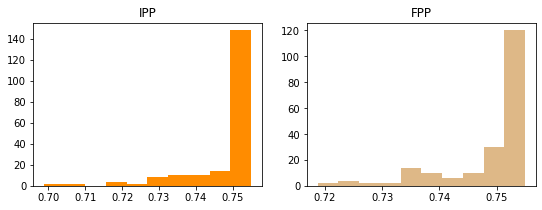

In [64]:
fig, ax = plt.subplots(1, 2,figsize=(9, 3))
ax[0].hist(list(ode_data_total.loc[ode_data_total.time == 0].ipp), color='darkorange')
ax[0].set_title('IPP')
ax[1].hist(list(ode_data_total.loc[ode_data_total.time == 0].fpp), color='burlywood')
ax[1].set_title('FPP')

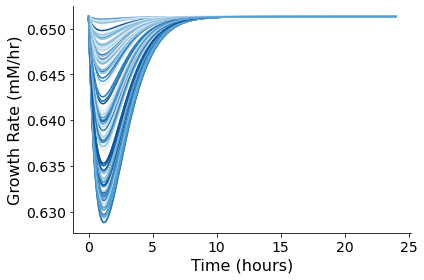

In [27]:
###FIGURE: Growth rate curve visualization
sns.set_palette("Blues")
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Time (hours)', fontsize=16)
ax.set_ylabel('Growth Rate (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
for w in fba_data_total.W.unique():
    fba_data = fba_data_total.loc[fba_data_total.W == w]
    ax.plot(fba_data.time, fba_data.lam)
fig.tight_layout()
#if save_figs: fig.savefig('../figs/fatty_acid_pareto_curve.png', dpi=500)

In [29]:
#compute sum under lam curve
burdens = []
for w in fba_data_total.W.unique():
    fba_data = fba_data_total.loc[fba_data_total.W == w].reset_index(drop=True)
    burden = sum(fba_data.lam[0] - fba_data.lam)
    burdens.append(burden)

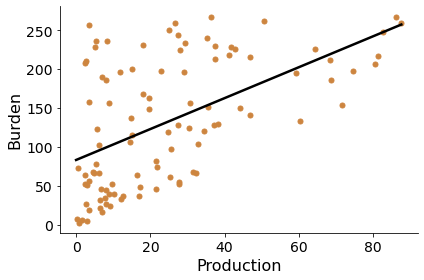

In [56]:
###FIGURE: Burden vs. production
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production', fontsize=16)
ax.set_ylabel('Burden', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

ax.plot(sum_data_total.bcar_tot, burdens, '.', c='peru', ms=10)
#Plot linear regression line
b, a = np.polyfit(sum_data_total.bcar_tot, burdens, deg=1)
xseq = np.linspace(0, max(sum_data_total.bcar_tot), num=100)
ax.plot(xseq, a + b * xseq, c='black', lw=2.5)

fig.tight_layout()
